In [1]:
import numpy as np
import math
import scipy
from matplotlib import pyplot as plt
from scipy.stats import norm

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

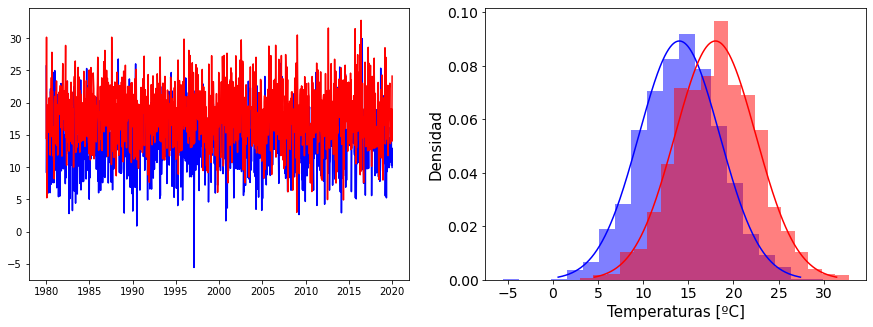

In [2]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
#Defino la media y la desviacion clima de referencia
media = 14 # ºC
varianza = 20 # ºC
sigma = math.sqrt(varianza)
temperaturas = np.linspace(media -3*sigma, media+ 3*sigma, 1000)
x = np.linspace(1980,2020,int(40*365/12))
weather = media + sigma * np.random.randn(int(40*365/12))
ax1.plot(x , weather, 'blue')

#Defino la media y la desviacion frente al cambio en el clima
media_CC = 18 # ºC
varianza_CC = 20 # ºC
sigma_CC = math.sqrt(varianza_CC)
temperaturas_CC = np.linspace(media_CC - 3*sigma_CC, media_CC + 3*sigma_CC, 1000)
weather_CC = media_CC + sigma_CC * np.random.randn(int(40*365/12))
ax1.plot(x, weather_CC, 'red')

ax2 = fig.add_subplot(1,2,2)
n, bins, patches = ax2.hist(weather, bins = 20,density=True, color='blue', alpha=0.5)
n, bins, patches = ax2.hist(weather_CC, bins = 20,density=True, color='red', alpha = 0.5)
ax2.plot(temperaturas, norm.pdf(temperaturas,media,sigma),'blue')
ax2.plot(temperaturas_CC, norm.pdf(temperaturas_CC,media_CC,sigma_CC),'red')
ax2.set_xlabel('Temperaturas [ºC]',fontsize=15)
ax2.set_ylabel('Densidad',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [3]:
import xarray as xr

In [4]:
path = '/home/julia/Desktop/GatoYlaCaja'
present = xr.open_dataset(path+'/era5.temperature.day.mean_1980-2018.nc').isel(lev=0)       #/tas_ensmean_1980-2014.nc')
near_future = xr.open_dataset(path+'/tas_day_CNRM-CM6-1_ssp585_2020-2060.nc')#/tas_near_future.nc')  #/tas_ensmean_2030-2070.nc')
future = xr.open_dataset(path+'/tas_day_CNRM-CM6-1_ssp585_2060-2099.nc')#/tas_future.nc')            #tas_ensmean_2060-2099.nc')

In [59]:
box_coords = (300,302,-36,-30)
tas_ref = present.t.sel(time=present['time.season']=='DJF').sel(lon=slice(box_coords[0],box_coords[1])).mean(dim='lon').sel(lat=slice(box_coords[3],box_coords[2])).mean(dim='lat')
tas_near_fut = near_future.tas.sel(time=near_future['time.season']=='DJF').sel(lon=slice(box_coords[0],box_coords[1])).mean(dim='lon').sel(lat=slice(box_coords[2],box_coords[3])).mean(dim='lat')
tas_fut = future.tas.sel(time=future['time.season']=='DJF').sel(lon=slice(box_coords[0],box_coords[1])).mean(dim='lon').sel(lat=slice(box_coords[2],box_coords[3])).mean(dim='lat')

In [60]:
tas_ref = tas_ref.values - 273.15
tas_near_fut = tas_near_fut.values - 273.15
tas_fut = tas_fut.values - 273.15
print(len(tas_ref),len(tas_near_fut),len(tas_fut))

3520 3701 3610


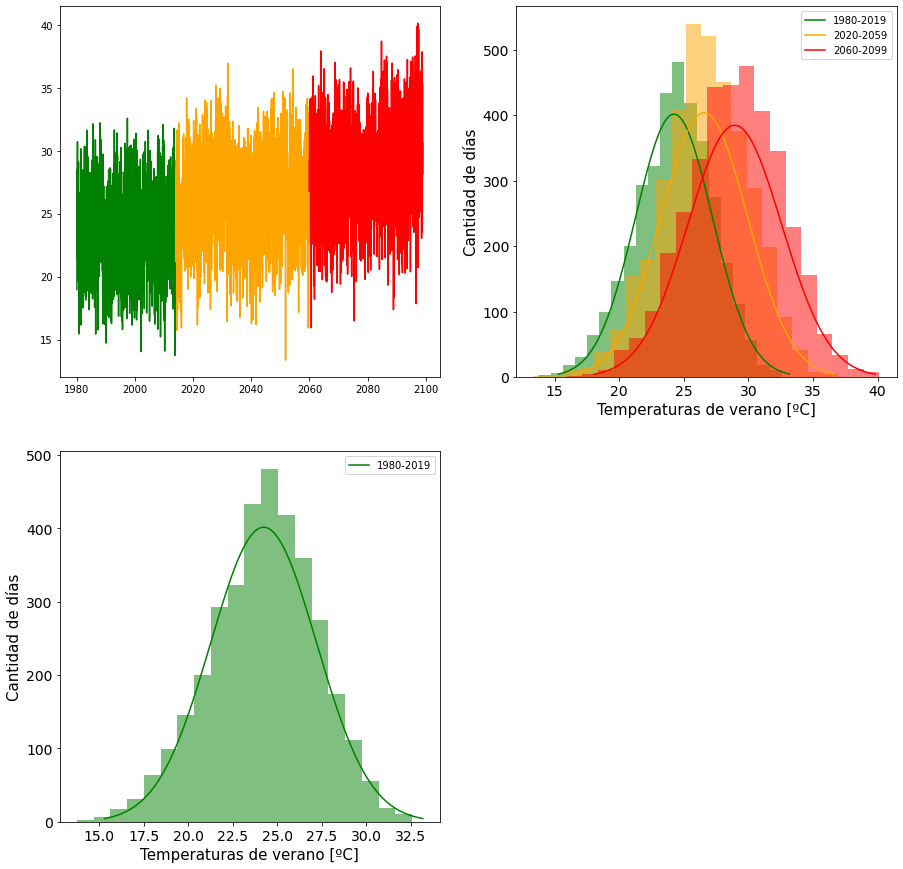

In [61]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(2,2,1)
#Defino la media y la desviacion clima de referencia
media = np.mean(tas_ref) # ºC
sigma = np.std(tas_ref) # ºC
temperaturas = np.linspace(media -3*sigma, media+ 3*sigma, 1000)
x = np.linspace(1980,2014,len(tas_ref))
ax1.plot(x , tas_ref, 'green')

#Defino la media y la desviacion frente al cambio en el clima
media_CC = np.mean(tas_near_fut)# ºC
sigma_CC = np.std(tas_near_fut) # ºC
temperaturas_CC = np.linspace(media_CC - 3*sigma_CC, media_CC + 3*sigma_CC, 1000)
x = np.linspace(2014,2060,len(tas_near_fut))
ax1.plot(x, tas_near_fut, 'orange')

#Defino la media y la desviacion frente al cambio en el clima
media_CC2 = np.mean(tas_fut)# ºC
sigma_CC2 = np.std(tas_fut) # ºC
temperaturas_CC2 = np.linspace(media_CC2 - 3*sigma_CC2, media_CC2 + 3*sigma_CC2, 1000)
x = np.linspace(2060,2099,len(tas_fut))
ax1.plot(x, tas_fut, 'red')

ax2 = fig.add_subplot(2,2,2)
n, bins, patches = ax2.hist(tas_ref, bins = 20,density=False, color='green', alpha=0.5)
n, bins, patches = ax2.hist(tas_near_fut, bins = 20,density=False, color='orange', alpha = 0.5)
n, bins, patches = ax2.hist(tas_fut, bins = 20,density=False, color='red', alpha = 0.5)
ax2.plot(temperaturas, norm.pdf(temperaturas,media,sigma)*3000,'green',label='1980-2019')
ax2.plot(temperaturas_CC, norm.pdf(temperaturas_CC,media_CC,sigma_CC)*3400,'orange',label='2020-2059')
ax2.plot(temperaturas_CC2, norm.pdf(temperaturas_CC2,media_CC2,sigma_CC2)*3500,'red',label='2060-2099')
ax2.set_xlabel('Temperaturas de verano [ºC]',fontsize=15)
ax2.set_ylabel('Cantidad de días',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()

ax3 = fig.add_subplot(2,2,3)
n, bins, patches = ax3.hist(tas_ref, bins = 20,density=False, color='green', alpha=0.5)
ax3.plot(temperaturas, norm.pdf(temperaturas,media,sigma)*3000,'green',label='1980-2019')

ax3.set_xlabel('Temperaturas de verano [ºC]',fontsize=15)
ax3.set_ylabel('Cantidad de días',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()

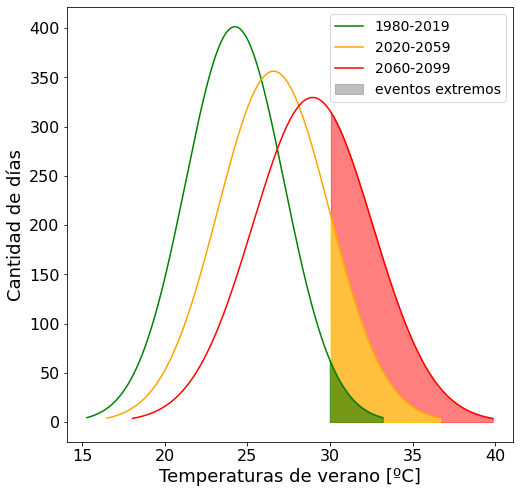

In [87]:
fig = plt.figure(figsize=(8,8))

x = np.arange(12, 30, 100)
zeros = np.ones(len(zeros))
ax2 = fig.add_subplot(1,1,1)
ax2.plot(temperaturas, norm.pdf(temperaturas,media,sigma)*3000,'green',label='1980-2019')
ax2.plot(temperaturas_CC, norm.pdf(temperaturas_CC,media_CC,sigma_CC)*3000,'orange',label='2020-2059')
ax2.plot(temperaturas_CC2, norm.pdf(temperaturas_CC2,media_CC2,sigma_CC2)*3000,'red',label='2060-2099')
ax2.fill_between(temperaturas[820:],norm.pdf(temperaturas,media,sigma)[820:]*3000,color='gray', alpha=0.5,label='eventos extremos')
ax2.fill_between(temperaturas_CC2[550:],norm.pdf(temperaturas_CC2,media_CC2,sigma_CC2)[550:]*3000,color='red', alpha=0.5)
ax2.fill_between(temperaturas_CC[670:],norm.pdf(temperaturas_CC,media_CC,sigma_CC)[670:]*3000,color='yellow', alpha=0.5)
ax2.fill_between(temperaturas[820:],norm.pdf(temperaturas,media,sigma)[820:]*3000,color='green', alpha=0.5)
ax2.set_xlabel('Temperaturas de verano [ºC]',fontsize=18)
ax2.set_ylabel('Cantidad de días',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=14)



In [24]:
len(temperaturas)

1000

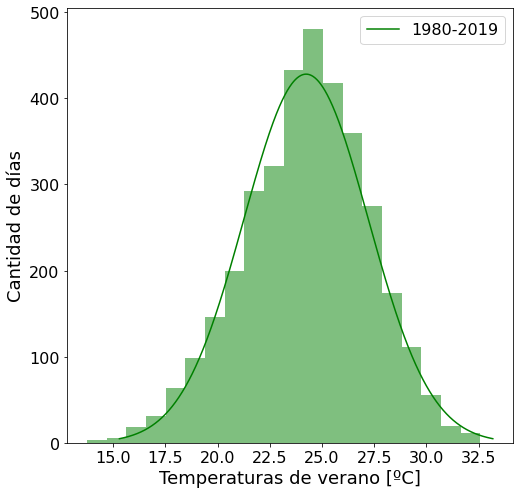

In [65]:
fig = plt.figure(figsize=(8,8))
ax3 = fig.add_subplot(1,1,1)
n, bins, patches = ax3.hist(tas_ref, bins = 20,density=False, color='green', alpha=0.5)
ax3.plot(temperaturas, norm.pdf(temperaturas,media,sigma)*3200,'green',label='1980-2019')

ax3.set_xlabel('Temperaturas de verano [ºC]',fontsize=18)
ax3.set_ylabel('Cantidad de días',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)